<a href="https://colab.research.google.com/github/tamayodb/CCDEPLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [ ]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [24]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

# Convert labels to binary (assuming ratings > 3 are positive, otherwise negative)
binary_labels = [1 if rating > 3 else 0 for rating in labels]

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = binary_labels[0:training_size]
testing_labels = binary_labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## 1. Tokenize the data

In [25]:
# Define tokenization parameters
vocab_size = 5000
embedding_dim = 32
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(f"\nFound {len(word_index)} unique tokens")


Found 3131 unique tokens


## 2. Sequence the data

In [26]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 3. Pad the data

In [27]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [28]:
print(f"Padded training sequences shape: {training_padded.shape}")
print(f"Padded testing sequences shape: {testing_padded.shape}")

Padded training sequences shape: (800, 100)
Padded testing sequences shape: (201, 100)


## 4. Train a sentiment model

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5657 - loss: 0.6862 - precision: 0.5719 - recall: 0.9615 - val_accuracy: 0.2139 - val_loss: 0.7636 - val_precision: 0.2139 - val_recall: 1.0000
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5417 - loss: 0.6853 - precision: 0.5418 - recall: 0.9278 - val_accuracy: 0.2139 - val_loss: 0.7995 - val_precision: 0.2139 - val_recall: 1.0000
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6086 - loss: 0.6285 - precision: 0.6046 - recall: 0.8982 - val_accuracy: 0.7015 - val_loss: 0.7974 - val_precision: 0.4000 - val_recall: 0.7907
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8466 - loss: 0.3471 - precision: 0.8843 - recall: 0.8218 - val_accuracy: 0.7463 - val_loss: 0.5718 - val_precision: 0.4429 - val_recall: 0.7209
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9285 - loss: 0.1730 - precision: 0.9411 - recall: 0.9285 - val_accuracy: 0.7114 - val_loss: 1.0445

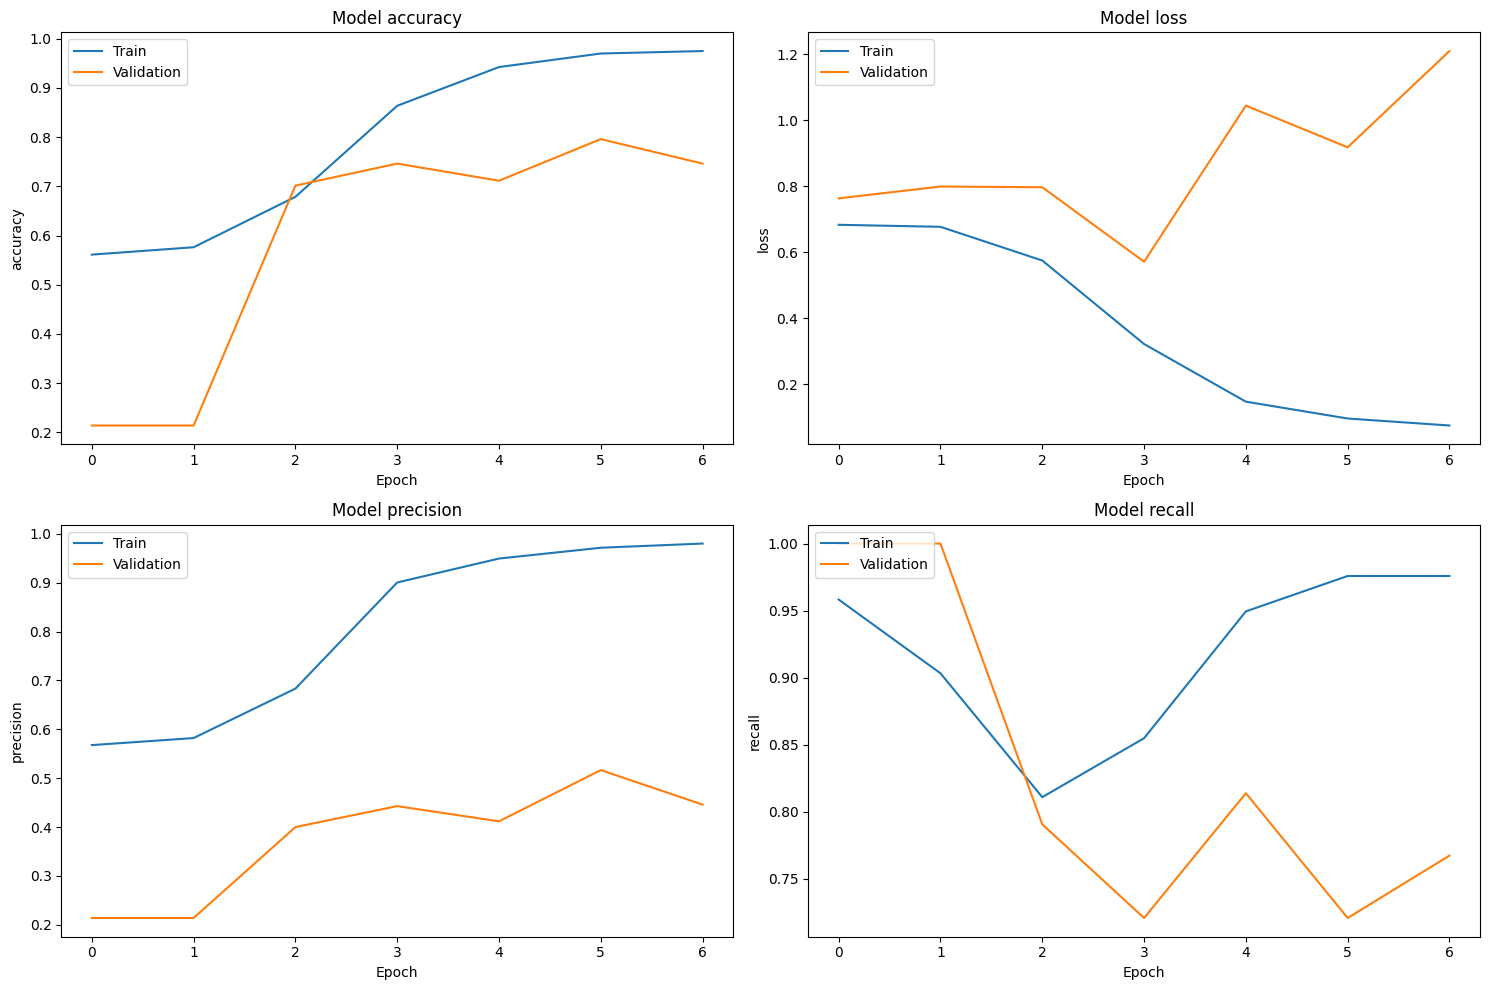

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

num_epochs = 30

training_labels_final = training_labels_final.astype(float)
testing_labels_final = testing_labels_final.astype(float)

history = model.fit(
    training_padded,
    training_labels_final,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels_final),
    verbose=1,
    callbacks=[early_stopping]
)

loss, accuracy, precision, recall = model.evaluate(testing_padded, testing_labels_final)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {2 * (precision * recall) / (precision + recall):.4f}")

def plot_metrics(history, metrics):
    """Plot specified metrics from training history"""
    plt.figure(figsize=(15, 10))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        plt.plot(history.history[metric])
        plt.plot(history.history[f'val_{metric}'])
        plt.title(f'Model {metric}')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_metrics(history, ['accuracy', 'loss', 'precision', 'recall'])

y_pred = model.predict(testing_padded)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

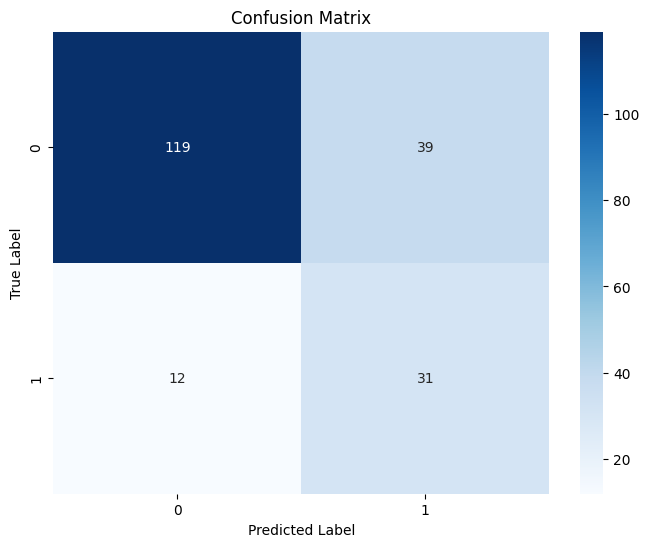


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82       158
         1.0       0.44      0.72      0.55        43

    accuracy                           0.75       201
   macro avg       0.68      0.74      0.69       201
weighted avg       0.81      0.75      0.76       201



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(testing_labels_final, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(testing_labels_final, y_pred_classes))

## Get files for visualing the network

In [34]:
embeddings = model.layers[0].get_weights()[0]
print(f"Embeddings shape: {embeddings.shape}")

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    if word_num in tokenizer.index_word:
        word = tokenizer.index_word[word_num]
        embedding = embeddings[word_num]
        out_m.write(word + "\n")
        out_v.write('\t'.join([str(x) for x in embedding]) + "\n")

out_v.close()
out_m.close()

try:
    from google.colab import files
    files.download('vecs.tsv')
    files.download('meta.tsv')
    print("Files downloaded for visualization")
except ImportError:
    print("Not running in Colab, files saved locally")

Embeddings shape: (5000, 32)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded for visualization


## 5. Predict sentiment with new reviews

In [52]:
def predict_sentiment(reviews, tokenizer, model, max_length=100, padding_type='post', trunc_type='post'):
    """
    Predict sentiment for a list of reviews

    Args:
        reviews: List of text reviews
        tokenizer: Fitted tokenizer
        model: Trained model
        max_length: Maximum sequence length
        padding_type: Type of padding
        trunc_type: Type of truncation

    Returns:
        List of predictions with review, sentiment, score and confidence
    """

    sequences = tokenizer.texts_to_sequences(reviews)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    predictions = model.predict(padded)

    results = []
    for i, review in enumerate(reviews):
        score = float(predictions[i][0])
        sentiment = "positive" if score > 0.5 else "negative"
        confidence = max(score, 1 - score)

        results.append({
            'review': review,
            'sentiment': sentiment,
            'score': score,
            'confidence': confidence
        })

    return results

# Sample reviews in Tagalog
fake_reviews = [
    # Positive reviews
    "Sobrang ganda ng cellphone na ito",
    "Ang ganda ng produkto na ito shit",
    "Mabilis ang delivery at kompleto ang items",

    # Negative reviews
    "Ayaw ko ng produkto nila",
    "Dumating na sira at hindi nakatulong ang customer service.",
    "Hindi gumagana kapag nakatayo ako",
    "Ang baho ng katabi ko putangina",
    "Huwag ka na magbenta bobo ka",

    # Neutral reviews
    "Sakto lang",
    "Medyo maayos naman ang serbisyo",
    "Hindi masyadong kakaiba pero pwede na"
]

print(fake_reviews)

padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print('\n')

def analyze_custom_review():
    """Prompt for and analyze a custom review"""
    review = input("\nEnter a review to analyze (or 'q' to quit): ")

    if review.lower() == 'q':
        return False

    results = predict_sentiment([review], tokenizer, model)
    result = results[0]

    print("-" * 80)
    print(f"Review: '{result['review']}'")
    print(f"Sentiment: {result['sentiment'].upper()} (Score: {result['score']:.4f}, Confidence: {result['confidence']:.2%})")
    print("-" * 80)

    return True

    continue_analysis = True
while continue_analysis:
    try:
        continue_analysis = analyze_custom_review()
    except KeyboardInterrupt:
        print("\nAnalysis terminated.")
        break

['Sobrang ganda ng cellphone na ito', 'Ang ganda ng produkto na ito shit', 'Mabilis ang delivery at kompleto ang items', 'Ayaw ko ng produkto nila', 'Dumating na sira at hindi nakatulong ang customer service.', 'Hindi gumagana kapag nakatayo ako', 'Ang baho ng katabi ko putangina', 'Huwag ka na magbenta bobo ka', 'Sakto lang', 'Medyo maayos naman ang serbisyo', 'Hindi masyadong kakaiba pero pwede na']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sobrang ganda ng cellphone na ito
[0.8587173]


Ang ganda ng produkto na ito shit
[0.60539323]


Mabilis ang delivery at kompleto ang items
[0.5886287]


Ayaw ko ng produkto nila
[0.37492642]


Dumating na sira at hindi nakatulong ang customer service.
[0.1535165]


Hindi gumagana kapag nakatayo ako
[0.45242465]


Ang baho ng katabi ko putangina
[0.34518567]


Huwag ka na magbenta bobo ka
[0.27911615]


Sakto lang
[0.48647976]


Medyo maayos naman ang serbisyo
[0.45826146]


